In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile("control_facturation_2025.xlsm")
print(xls.sheet_names)

['2025', '2024', '2021 - 2023', 'Clientes', 'Sheet7', 'Gastos mensuales']


In [3]:
data1 = pd.read_excel("control_facturation_2025.xlsm", sheet_name = "2024")
data2 = pd.read_excel("control_facturation_2025.xlsm", sheet_name = '2021 - 2023', header = 3)

C:\Users\jorge\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
print(data1.columns)

Index(['Empresa', 'Requisitor', 'PO', 'Fecha de PO', 'no. De Cotización',
       'Cantidad', 'Descripción', 'Precio Unitario', 'Moneda', 'SubTotal',
       '..', 'Total con IVA(8%)', '…', 'Factura', 'Fecha de Facturación',
       'Razon Social', 'Nombre', 'Observaciones / Notas'],
      dtype='object')


In [5]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Empresa                414 non-null    object 
 1   Requisitor             414 non-null    object 
 2   PO                     414 non-null    object 
 3   Fecha de PO            415 non-null    object 
 4   no. De Cotización      407 non-null    object 
 5   Cantidad               414 non-null    float64
 6   Descripción            414 non-null    object 
 7   Precio Unitario        414 non-null    float64
 8   Moneda                 414 non-null    object 
 9   SubTotal               414 non-null    float64
 10  ..                     414 non-null    object 
 11  Total con IVA(8%)      415 non-null    float64
 12  …                      414 non-null    object 
 13  Factura                384 non-null    object 
 14  Fecha de Facturación   382 non-null    object 
 15  Razon 

In [6]:
print(data1.isna().sum())

Empresa                  583
Requisitor               583
PO                       583
Fecha de PO              582
no. De Cotización        590
Cantidad                 583
Descripción              583
Precio Unitario          583
Moneda                   583
SubTotal                 583
..                       583
Total con IVA(8%)        582
…                        583
Factura                  613
Fecha de Facturación     615
Razon Social             583
Nombre                   584
Observaciones / Notas    979
dtype: int64


In [7]:
data1 = data1.dropna(how = "all")
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 996
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Empresa                414 non-null    object 
 1   Requisitor             414 non-null    object 
 2   PO                     414 non-null    object 
 3   Fecha de PO            415 non-null    object 
 4   no. De Cotización      407 non-null    object 
 5   Cantidad               414 non-null    float64
 6   Descripción            414 non-null    object 
 7   Precio Unitario        414 non-null    float64
 8   Moneda                 414 non-null    object 
 9   SubTotal               414 non-null    float64
 10  ..                     414 non-null    object 
 11  Total con IVA(8%)      415 non-null    float64
 12  …                      414 non-null    object 
 13  Factura                384 non-null    object 
 14  Fecha de Facturación   382 non-null    object 
 15  Razon Socia

In [8]:
data1 = data1.drop(columns = ['..', '…'])

In [9]:
data1.columns = [col.replace(" ", "_") for col in data1.columns]
data1.columns = [col.replace("/_", "") for col in data1.columns]
data1.columns = [col.replace(".", "") for col in data1.columns]
data1.columns = data1.columns.str.lower()
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 996
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   empresa               414 non-null    object 
 1   requisitor            414 non-null    object 
 2   po                    414 non-null    object 
 3   fecha_de_po           415 non-null    object 
 4   no_de_cotización      407 non-null    object 
 5   cantidad              414 non-null    float64
 6   descripción           414 non-null    object 
 7   precio_unitario       414 non-null    float64
 8   moneda                414 non-null    object 
 9   subtotal              414 non-null    float64
 10  total_con_iva(8%)     415 non-null    float64
 11  factura               384 non-null    object 
 12  fecha_de_facturación  382 non-null    object 
 13  razon_social          414 non-null    object 
 14  nombre                413 non-null    object 
 15  observaciones_notas   18 non

In [10]:
data1.rename(columns={
    'no_de_cotización': 'num_cot',
    'precio_unitario' : 'p_unit',
    
}, inplace=True)

In [11]:
data1['fecha_de_po'] = pd.to_datetime(data1['fecha_de_po'], errors='coerce')
data1['fecha_de_facturación'] = pd.to_datetime(data1['fecha_de_facturación'], errors='coerce')
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 996
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   empresa               414 non-null    object        
 1   requisitor            414 non-null    object        
 2   po                    414 non-null    object        
 3   fecha_de_po           413 non-null    datetime64[ns]
 4   num_cot               407 non-null    object        
 5   cantidad              414 non-null    float64       
 6   descripción           414 non-null    object        
 7   p_unit                414 non-null    float64       
 8   moneda                414 non-null    object        
 9   subtotal              414 non-null    float64       
 10  total_con_iva(8%)     415 non-null    float64       
 11  factura               384 non-null    object        
 12  fecha_de_facturación  380 non-null    datetime64[ns]
 13  razon_social          414

In [12]:
print(data1.head())

       empresa       requisitor          po fecha_de_po num_cot  cantidad  \
0  Logical USD  Ubaldo Calderón   L112024-1  2024-01-03    3980       1.0   
1  Logical USD  Ubaldo Calderón   L010424-2  2024-01-04    3989       3.0   
2    Medtronic    Luis Fernando  4200965110  2023-12-13    3975       3.0   
3    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       3.0   
4    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       1.0   

                            descripción  p_unit moneda  subtotal  \
0                       Componentes CAF  7820.0   Dlls    7820.0   
1           Plunger Dib. L2348-110-T031    55.0   Dlls     165.0   
2               0.0195 Necking TS130129  4580.0     MN   13740.0   
3    Tip Attach tubing Flaring TS114580  1950.0     MN    5850.0   
4                        Tip Cut VBLOCK  4500.0     MN    4500.0   

   total_con_iva(8%) factura fecha_de_facturación   razon_social  \
0             8445.6      80           2024-01-03  LEMC82040

In [13]:
data1['p_unit_dll'] = np.where(data1['moneda'] == 'Dlls', data1['p_unit'], np.nan)
data1['p_unit_pesos'] = np.where(data1['moneda'] == 'MN', data1['p_unit'], np.nan)

print(data1.head())

       empresa       requisitor          po fecha_de_po num_cot  cantidad  \
0  Logical USD  Ubaldo Calderón   L112024-1  2024-01-03    3980       1.0   
1  Logical USD  Ubaldo Calderón   L010424-2  2024-01-04    3989       3.0   
2    Medtronic    Luis Fernando  4200965110  2023-12-13    3975       3.0   
3    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       3.0   
4    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       1.0   

                            descripción  p_unit moneda  subtotal  \
0                       Componentes CAF  7820.0   Dlls    7820.0   
1           Plunger Dib. L2348-110-T031    55.0   Dlls     165.0   
2               0.0195 Necking TS130129  4580.0     MN   13740.0   
3    Tip Attach tubing Flaring TS114580  1950.0     MN    5850.0   
4                        Tip Cut VBLOCK  4500.0     MN    4500.0   

   total_con_iva(8%) factura fecha_de_facturación   razon_social  \
0             8445.6      80           2024-01-03  LEMC82040

In [14]:
data1['sub_total_dll'] = data1['p_unit_dll'] * data1['cantidad']
data1['sub_total_pesos'] = data1['p_unit_pesos'] * data1['cantidad']
data1['total_iva_dll'] = data1['sub_total_dll'] + (data1['sub_total_dll']*0.08)
data1['total_iva_pesos'] = data1['sub_total_pesos'] + (data1['sub_total_pesos']*0.08)

print(data1.head())

       empresa       requisitor          po fecha_de_po num_cot  cantidad  \
0  Logical USD  Ubaldo Calderón   L112024-1  2024-01-03    3980       1.0   
1  Logical USD  Ubaldo Calderón   L010424-2  2024-01-04    3989       3.0   
2    Medtronic    Luis Fernando  4200965110  2023-12-13    3975       3.0   
3    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       3.0   
4    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       1.0   

                            descripción  p_unit moneda  subtotal  ...  \
0                       Componentes CAF  7820.0   Dlls    7820.0  ...   
1           Plunger Dib. L2348-110-T031    55.0   Dlls     165.0  ...   
2               0.0195 Necking TS130129  4580.0     MN   13740.0  ...   
3    Tip Attach tubing Flaring TS114580  1950.0     MN    5850.0  ...   
4                        Tip Cut VBLOCK  4500.0     MN    4500.0  ...   

   fecha_de_facturación   razon_social  \
0            2024-01-03  LEMC820406120   
1            2

In [15]:
print(data1.columns)

Index(['empresa', 'requisitor', 'po', 'fecha_de_po', 'num_cot', 'cantidad',
       'descripción', 'p_unit', 'moneda', 'subtotal', 'total_con_iva(8%)',
       'factura', 'fecha_de_facturación', 'razon_social', 'nombre',
       'observaciones_notas', 'p_unit_dll', 'p_unit_pesos', 'sub_total_dll',
       'sub_total_pesos', 'total_iva_dll', 'total_iva_pesos'],
      dtype='object')


In [16]:
data_clean1 = data1.drop(['moneda', 'total_con_iva(8%)', 'subtotal', 'observaciones_notas', 'p_unit', 'factura', 'fecha_de_facturación', 'razon_social', 'nombre'], axis=1)
print(data_clean1.head())

       empresa       requisitor          po fecha_de_po num_cot  cantidad  \
0  Logical USD  Ubaldo Calderón   L112024-1  2024-01-03    3980       1.0   
1  Logical USD  Ubaldo Calderón   L010424-2  2024-01-04    3989       3.0   
2    Medtronic    Luis Fernando  4200965110  2023-12-13    3975       3.0   
3    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       3.0   
4    Medtronic    Luis Fernando  4200961946  2023-12-06    3974       1.0   

                            descripción  p_unit_dll  p_unit_pesos  \
0                       Componentes CAF      7820.0           NaN   
1           Plunger Dib. L2348-110-T031        55.0           NaN   
2               0.0195 Necking TS130129         NaN        4580.0   
3    Tip Attach tubing Flaring TS114580         NaN        1950.0   
4                        Tip Cut VBLOCK         NaN        4500.0   

   sub_total_dll  sub_total_pesos  total_iva_dll  total_iva_pesos  
0         7820.0              NaN         8445.6      

In [17]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1 non-null      object 
 1   COT #              589 non-null    object 
 2   PO                 701 non-null    object 
 3   Compañia           718 non-null    object 
 4   REQUISITOR         571 non-null    object 
 5   Descripción        719 non-null    object 
 6   Cantidad           711 non-null    float64
 7   P UNIT             495 non-null    float64
 8   TOTAL              669 non-null    float64
 9   PESOS              221 non-null    float64
 10  PESOS2             1273 non-null   float64
 11  Fecha de Recibido  459 non-null    object 
 12  Fecha de Entrega   328 non-null    object 
 13  STATUS             718 non-null    object 
 14  STATUS2            658 non-null    object 
 15  OBSERVACIONES      704 non-null    object 
 16  Column1            704 n

In [18]:
print(data2.head())

  Unnamed: 0 COT #     PO Compañia       REQUISITOR   \
0        NaN  2882  22987  AUXITROL  ALBERTO CORDERO   
1        NaN  2884  22987  AUXITROL  ALBERTO CORDERO   
2        NaN  2885  22987  AUXITROL  ALBERTO CORDERO   
3        NaN  2886  22897  AUXITROL  ALBERTO CORDERO   
4        NaN  2892  22897  AUXITROL  ALBERTO CORDERO   

                      Descripción  Cantidad  P UNIT   TOTAL  PESOS  PESOS2  \
0            TS0798 GRINDING TOOL       1.0  1100.0  1100.0    NaN     0.0   
1  TS0932 ea Eucapsulaion Fixture       1.0   600.0   600.0    NaN     0.0   
2           TS0938 TACK WELD TOOL       1.0   850.0   850.0    NaN     0.0   
3           TS0978 TACK WELD TOOL       1.0  1500.0  1500.0    NaN     0.0   
4            TS1544 GRINDING TOOL       1.0  1250.0  1250.0    NaN     0.0   

     Fecha de Recibido     Fecha de Entrega      STATUS    STATUS2  \
0  2021-02-05 00:00:00  2021-02-26 00:00:00  EN PROCESO  ENTREGADO   
1  2021-02-05 00:00:00  2021-02-26 00:00:00  EN PROCES

In [19]:
print(data2.columns)

Index(['Unnamed: 0', 'COT #', 'PO', 'Compañia ', 'REQUISITOR ', 'Descripción',
       'Cantidad', 'P UNIT', 'TOTAL', 'PESOS', 'PESOS2', 'Fecha de Recibido',
       'Fecha de Entrega', 'STATUS', 'STATUS2', 'OBSERVACIONES', 'Column1',
       'Column2', 'Column3', 'Column4'],
      dtype='object')


In [20]:
data2.drop(['Unnamed: 0','Column2', 'Column3', 'Column4'], axis = 1, inplace = True) 

In [21]:
data2 = data2.dropna(how = "all")
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1294
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COT #              589 non-null    object 
 1   PO                 701 non-null    object 
 2   Compañia           718 non-null    object 
 3   REQUISITOR         571 non-null    object 
 4   Descripción        719 non-null    object 
 5   Cantidad           711 non-null    float64
 6   P UNIT             495 non-null    float64
 7   TOTAL              669 non-null    float64
 8   PESOS              221 non-null    float64
 9   PESOS2             1273 non-null   float64
 10  Fecha de Recibido  459 non-null    object 
 11  Fecha de Entrega   328 non-null    object 
 12  STATUS             718 non-null    object 
 13  STATUS2            658 non-null    object 
 14  OBSERVACIONES      704 non-null    object 
 15  Column1            704 non-null    object 
dtypes: float64(5), object(11)
mem

In [22]:
data2.columns = [col.replace(" ", "_") for col in data2.columns]
data2.columns = data2.columns.str.lower()
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1294
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cot_#              589 non-null    object 
 1   po                 701 non-null    object 
 2   compañia_          718 non-null    object 
 3   requisitor_        571 non-null    object 
 4   descripción        719 non-null    object 
 5   cantidad           711 non-null    float64
 6   p_unit             495 non-null    float64
 7   total              669 non-null    float64
 8   pesos              221 non-null    float64
 9   pesos2             1273 non-null   float64
 10  fecha_de_recibido  459 non-null    object 
 11  fecha_de_entrega   328 non-null    object 
 12  status             718 non-null    object 
 13  status2            658 non-null    object 
 14  observaciones      704 non-null    object 
 15  column1            704 non-null    object 
dtypes: float64(5), object(11)
mem

In [23]:
print(data2.head(10))

  cot_#          po compañia_      requisitor_  \
0  2882       22987  AUXITROL  ALBERTO CORDERO   
1  2884       22987  AUXITROL  ALBERTO CORDERO   
2  2885       22987  AUXITROL  ALBERTO CORDERO   
3  2886       22897  AUXITROL  ALBERTO CORDERO   
4  2892       22897  AUXITROL  ALBERTO CORDERO   
5  2902       22897  AUXITROL  ALBERTO CORDERO   
6  2927       23047  AUXITROL     DAVID CECEÑA   
7  2928       23047  AUXITROL     DAVID CECEÑA   
8  2942  4500941797    BOURNS     JAVIER NUÑEZ   
9  2947  4500941797    BOURNS     JAVIER NUÑEZ   

                          descripción  cantidad  p_unit   total  pesos  \
0                TS0798 GRINDING TOOL       1.0  1100.0  1100.0    NaN   
1      TS0932 ea Eucapsulaion Fixture       1.0   600.0   600.0    NaN   
2               TS0938 TACK WELD TOOL       1.0   850.0   850.0    NaN   
3               TS0978 TACK WELD TOOL       1.0  1500.0  1500.0    NaN   
4                TS1544 GRINDING TOOL       1.0  1250.0  1250.0    NaN   
5    

In [24]:
data2.rename(columns={
    'cot_#': 'num_cot',
    'compañia_': 'empresa',
    'requisitor_': 'requisitor',
    'column1': 'fecha',
    'p_unit' : 'p_unit_dll',
    'total' : 'sub_total_dll',
    'pesos' : 'p_unit_pesos',
    'pesos2' : 'sub_total_pesos',
    'fecha_de_recibido' : 'fecha_de_po',
}, inplace=True)
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1294
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num_cot           589 non-null    object 
 1   po                701 non-null    object 
 2   empresa           718 non-null    object 
 3   requisitor        571 non-null    object 
 4   descripción       719 non-null    object 
 5   cantidad          711 non-null    float64
 6   p_unit_dll        495 non-null    float64
 7   sub_total_dll     669 non-null    float64
 8   p_unit_pesos      221 non-null    float64
 9   sub_total_pesos   1273 non-null   float64
 10  fecha_de_po       459 non-null    object 
 11  fecha_de_entrega  328 non-null    object 
 12  status            718 non-null    object 
 13  status2           658 non-null    object 
 14  observaciones     704 non-null    object 
 15  fecha             704 non-null    object 
dtypes: float64(5), object(11)
memory usage: 170.5+ 

In [25]:
data2['fecha'] = pd.to_datetime(data2['fecha'], errors='coerce')
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1294
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   num_cot           589 non-null    object        
 1   po                701 non-null    object        
 2   empresa           718 non-null    object        
 3   requisitor        571 non-null    object        
 4   descripción       719 non-null    object        
 5   cantidad          711 non-null    float64       
 6   p_unit_dll        495 non-null    float64       
 7   sub_total_dll     669 non-null    float64       
 8   p_unit_pesos      221 non-null    float64       
 9   sub_total_pesos   1273 non-null   float64       
 10  fecha_de_po       459 non-null    object        
 11  fecha_de_entrega  328 non-null    object        
 12  status            718 non-null    object        
 13  status2           658 non-null    object        
 14  observaciones     704 non-nul

In [26]:
print(data_clean1.columns)

Index(['empresa', 'requisitor', 'po', 'fecha_de_po', 'num_cot', 'cantidad',
       'descripción', 'p_unit_dll', 'p_unit_pesos', 'sub_total_dll',
       'sub_total_pesos', 'total_iva_dll', 'total_iva_pesos'],
      dtype='object')


In [27]:
data_clean2 = data2.drop(['fecha', 'observaciones', 'fecha_de_entrega'], axis=1)
print(data_clean2.columns)

Index(['num_cot', 'po', 'empresa', 'requisitor', 'descripción', 'cantidad',
       'p_unit_dll', 'sub_total_dll', 'p_unit_pesos', 'sub_total_pesos',
       'fecha_de_po', 'status', 'status2'],
      dtype='object')


In [28]:
big_data = pd.concat([data_clean1, data_clean2], axis=0, ignore_index=True)
print(big_data.sample(5))

         empresa           requisitor           po          fecha_de_po  \
1660         NaN                  NaN          NaN                  NaN   
632   GREATBATCH         ITZEL GALVAN        86628  2021-10-28 00:00:00   
1513         NaN                  NaN          NaN                  NaN   
105   Greatbatch  Daniel Hiram Flores  JP310040045  2024-04-09 00:00:00   
148   Greatbatch        Salvador Diaz  JP310045932  2024-06-03 00:00:00   

     num_cot  cantidad                                descripción  p_unit_dll  \
1660     NaN       NaN                                        NaN         NaN   
632     3301       1.0                        Form slide M963992A       700.0   
1513     NaN       NaN                                        NaN         NaN   
105     4077       1.0   De Carrier base Bertical #19TM09PK00-001       295.0   
148     4125       2.0              Inner Support #19tm096f00-011       295.0   

      p_unit_pesos  sub_total_dll  sub_total_pesos  total_iva_

In [29]:
print(big_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   empresa          1132 non-null   object 
 1   requisitor       985 non-null    object 
 2   po               1115 non-null   object 
 3   fecha_de_po      872 non-null    object 
 4   num_cot          996 non-null    object 
 5   cantidad         1125 non-null   float64
 6   descripción      1133 non-null   object 
 7   p_unit_dll       722 non-null    float64
 8   p_unit_pesos     408 non-null    float64
 9   sub_total_dll    896 non-null    float64
 10  sub_total_pesos  1460 non-null   float64
 11  total_iva_dll    227 non-null    float64
 12  total_iva_pesos  187 non-null    float64
 13  status           718 non-null    object 
 14  status2          658 non-null    object 
dtypes: float64(7), object(8)
memory usage: 199.3+ KB
None


In [30]:
big_data['fecha_de_po'] = pd.to_datetime(big_data['fecha_de_po'], errors='coerce')

In [31]:
medtronic_data = big_data[big_data["empresa"] == 'Medtronic']
print(medtronic_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2 to 1133
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   empresa          244 non-null    object        
 1   requisitor       242 non-null    object        
 2   po               244 non-null    object        
 3   fecha_de_po      237 non-null    datetime64[ns]
 4   num_cot          244 non-null    object        
 5   cantidad         244 non-null    float64       
 6   descripción      244 non-null    object        
 7   p_unit_dll       1 non-null      float64       
 8   p_unit_pesos     243 non-null    float64       
 9   sub_total_dll    62 non-null     float64       
 10  sub_total_pesos  244 non-null    float64       
 11  total_iva_dll    0 non-null      float64       
 12  total_iva_pesos  172 non-null    float64       
 13  status           72 non-null     object        
 14  status2          44 non-null     object       

In [32]:
print(medtronic_data.describe())

                         fecha_de_po    cantidad  p_unit_dll  p_unit_pesos  \
count                            237  244.000000         1.0    243.000000   
mean   2024-04-10 11:50:53.164557056    3.036885      2550.0   5870.594650   
min              2022-11-01 00:00:00    1.000000      2550.0    157.000000   
25%              2023-11-23 00:00:00    1.000000      2550.0   2250.000000   
50%              2024-07-01 00:00:00    1.000000      2550.0   3500.000000   
75%              2024-09-19 00:00:00    4.000000      2550.0   4900.000000   
max              2024-12-16 00:00:00   20.000000      2550.0  57500.000000   
std                              NaN    3.435872         NaN   7984.928446   

       sub_total_dll  sub_total_pesos  total_iva_dll  total_iva_pesos  
count      62.000000       244.000000            0.0       172.000000  
mean      411.290323     11031.352459            NaN     11938.520930  
min         0.000000         0.000000            NaN       410.400000  
25%      

In [33]:
print(medtronic_data["po"].count())

244


In [34]:
print(medtronic_data["total_iva_pesos"].sum())

2053425.5999999999


In [35]:
print(medtronic_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2 to 1133
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   empresa          244 non-null    object        
 1   requisitor       242 non-null    object        
 2   po               244 non-null    object        
 3   fecha_de_po      237 non-null    datetime64[ns]
 4   num_cot          244 non-null    object        
 5   cantidad         244 non-null    float64       
 6   descripción      244 non-null    object        
 7   p_unit_dll       1 non-null      float64       
 8   p_unit_pesos     243 non-null    float64       
 9   sub_total_dll    62 non-null     float64       
 10  sub_total_pesos  244 non-null    float64       
 11  total_iva_dll    0 non-null      float64       
 12  total_iva_pesos  172 non-null    float64       
 13  status           72 non-null     object        
 14  status2          44 non-null     object       

In [36]:
medtronic_data['year'] = medtronic_data['fecha_de_po'].dt.year
medtronic_data['month'] = medtronic_data['fecha_de_po'].dt.month
medtronic_data['day'] = medtronic_data['fecha_de_po'].dt.day
print(medtronic_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2 to 1133
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   empresa          244 non-null    object        
 1   requisitor       242 non-null    object        
 2   po               244 non-null    object        
 3   fecha_de_po      237 non-null    datetime64[ns]
 4   num_cot          244 non-null    object        
 5   cantidad         244 non-null    float64       
 6   descripción      244 non-null    object        
 7   p_unit_dll       1 non-null      float64       
 8   p_unit_pesos     243 non-null    float64       
 9   sub_total_dll    62 non-null     float64       
 10  sub_total_pesos  244 non-null    float64       
 11  total_iva_dll    0 non-null      float64       
 12  total_iva_pesos  172 non-null    float64       
 13  status           72 non-null     object        
 14  status2          44 non-null     object       

C:\Users\jorge\AppData\Local\Temp\ipykernel_54340\3769313119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medtronic_data['year'] = medtronic_data['fecha_de_po'].dt.year
C:\Users\jorge\AppData\Local\Temp\ipykernel_54340\3769313119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medtronic_data['month'] = medtronic_data['fecha_de_po'].dt.month
C:\Users\jorge\AppData\Local\Temp\ipykernel_54340\3769313119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

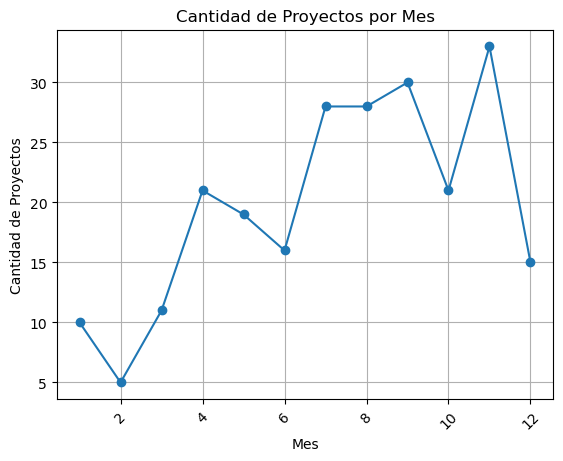

In [37]:
proyectos_por_mes = medtronic_data.groupby('month')['descripción'].count()

# Graficar los datos
plt.plot(proyectos_por_mes.index, proyectos_por_mes.values, marker='o', linestyle='-')

# Agregar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad de Proyectos')
plt.title('Cantidad de Proyectos por Mes')
plt.xticks(rotation=45)  
plt.grid(True)  

plt.show()

<Axes: xlabel='requisitor'>

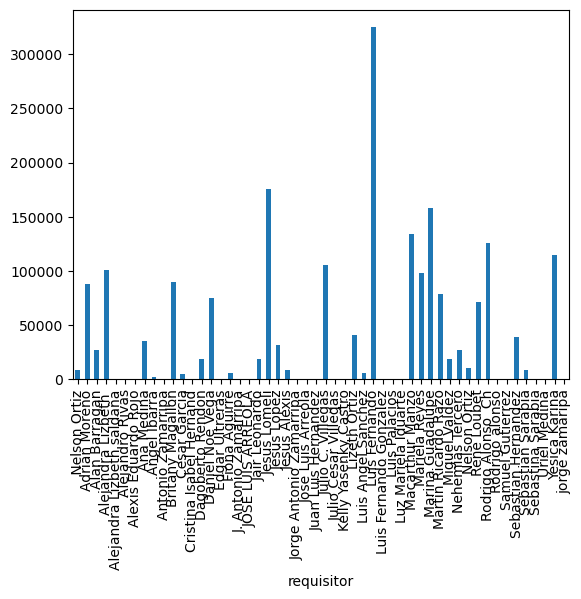

In [38]:
proyectos_medtronic_por_cliente = medtronic_data.groupby('requisitor')['total_iva_pesos'].sum()
proyectos_medtronic_por_cliente.plot(kind = 'bar')

In [39]:
clientes_top = proyectos_medtronic_por_cliente[proyectos_medtronic_por_cliente > 20]
print(clientes_top.head())

requisitor
 Nelson Ortiz           8559.0
Adrian Moreno          88020.0
Alan Barragan          27000.0
Alejandra Lizbeth     100656.0
Ana Medina             34938.0
Name: total_iva_pesos, dtype: float64


<Axes: xlabel='requisitor'>

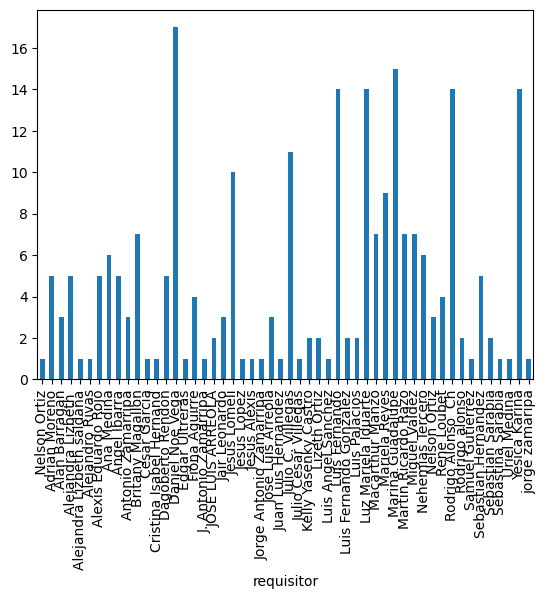

In [40]:
proyectos_medtronic_count = medtronic_data.groupby('requisitor')['descripción'].count()
proyectos_medtronic_count.plot(kind = 'bar')

requisitor
Daniel Noe Vega        17
Luis Fernando          14
Luz Mariela Iduarte    14
Marina Guadalupe       15
Rodrigo Alonso  Ch     14
Name: descripción, dtype: int64


<Axes: xlabel='requisitor'>

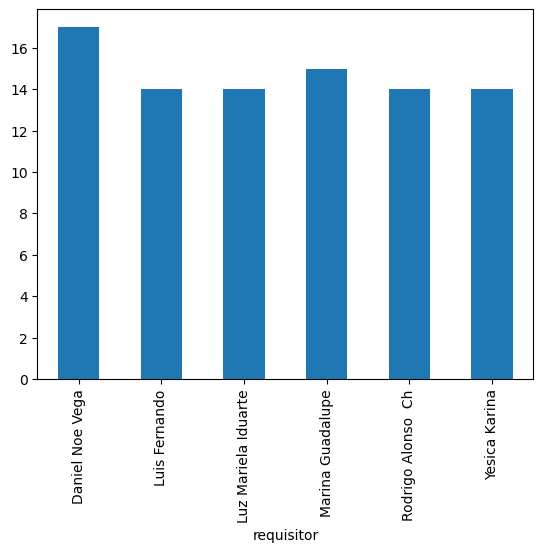

In [41]:
clientes_top_count = proyectos_medtronic_count[proyectos_medtronic_count > 12]
print(clientes_top_count.head())
clientes_top_count.plot(kind = 'bar')

<Axes: xlabel='requisitor'>

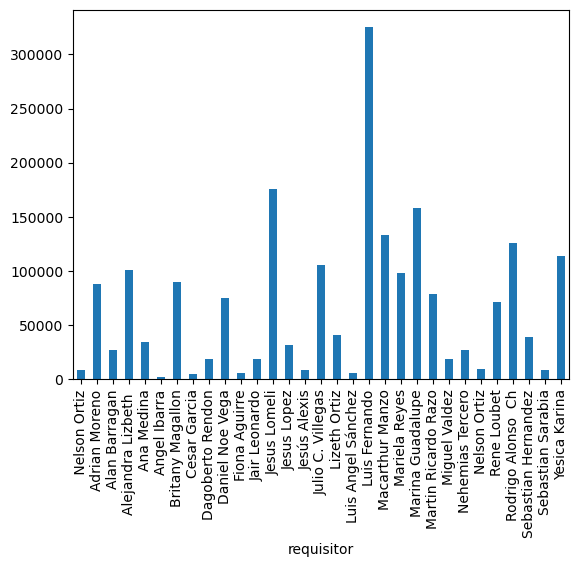

In [42]:
clientes_top.plot(kind = 'bar')

In [43]:
big_data.to_excel("datos_idm.xlsx", index = False)